## Lecture4: Data Exploration

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

## Source
- File: [**Kaggle**](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)<br>
- Source: [**CPE352 Data Science** by **Santitham**](https://youtu.be/7XnTK3Ub6rs?si=3xrPxbBoqlWTyopJ)

In [3]:
import numpy as np
import pandas as pd
print("numpy version :",np.__version__)
print("pandas version :",pd.__version__)

numpy version : 1.26.4
pandas version : 2.2.1


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version :",mpl.__version__)

matplotlib version : 3.8.4


In [6]:
from PIL import Image
from IPython.display import display

In [7]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-07-31 13:23:08.368999


In [5]:
pd.set_option('display.max_columns',30)

## Import Data

In [15]:
df = pd.read_csv('data/Telco-Customer-Churn.csv', index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [19]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [21]:
df['TotalCharges'].isna().any()

False

In [23]:
df['TotalCharges']= df['TotalCharges'].replace(' ', '0')

In [25]:
df['TotalCharges'].value_counts()

TotalCharges
0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [27]:
# in case null
# df[df.isna().any()] # call for row with null
# df[df['tenure'] == 0]  # root cause

In [29]:
df = df.astype({'TotalCharges': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### frequency table

In [32]:
pd.crosstab(df['Churn'], columns= 'N', normalize='columns')   # prior probability

col_0,N
Churn,
No,0.73463
Yes,0.26537


prior + evidence/likelihood => posterior prob
pr(D|test) = Pr(test|D)*Pr(D)/Pr(test)

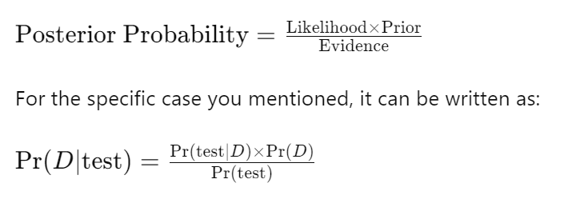

In [50]:
img = Image.open('figure/prior prob.png')
w,h = img.size
s = 0.8
img = img.resize((int(s*w),int(s*h)))
display(img)

In [11]:
import seaborn as sns

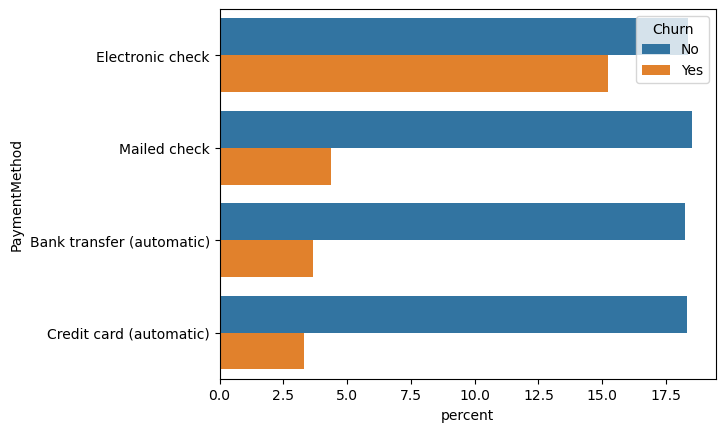

In [88]:
sns.countplot(data = df, y ='PaymentMethod', hue='Churn',stat= 'percent');

In [93]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### boxplot

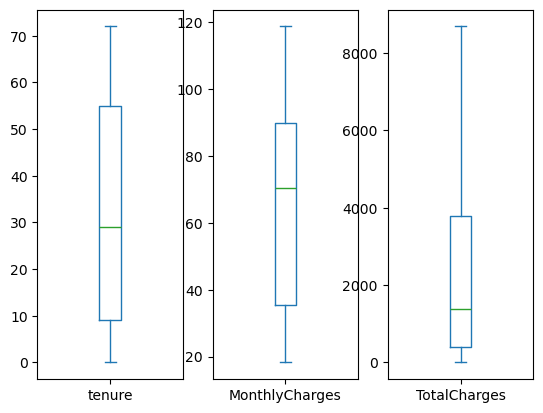

In [125]:
df[['tenure','MonthlyCharges','TotalCharges']].plot(kind='box', subplots=True, sharey=False);

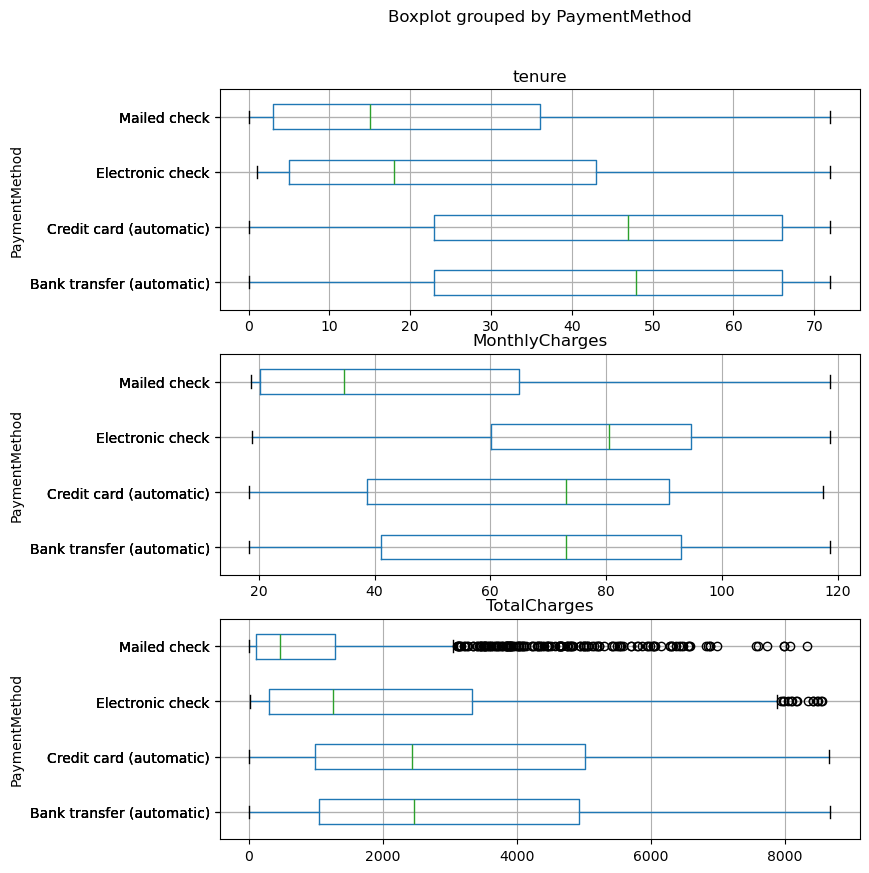

In [145]:
df.boxplot(column = ['tenure','MonthlyCharges','TotalCharges'],
           by ='PaymentMethod', sharex=False, vert=False,
          layout=(3,1), figsize=(8,10));

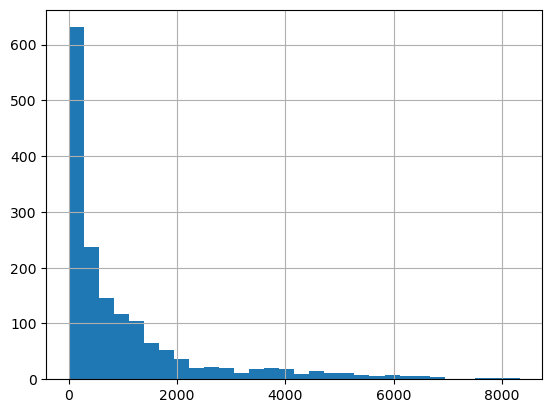

In [171]:
df[df['PaymentMethod']=='Mailed check']['TotalCharges'].hist(bins=30);

In [161]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### barchart

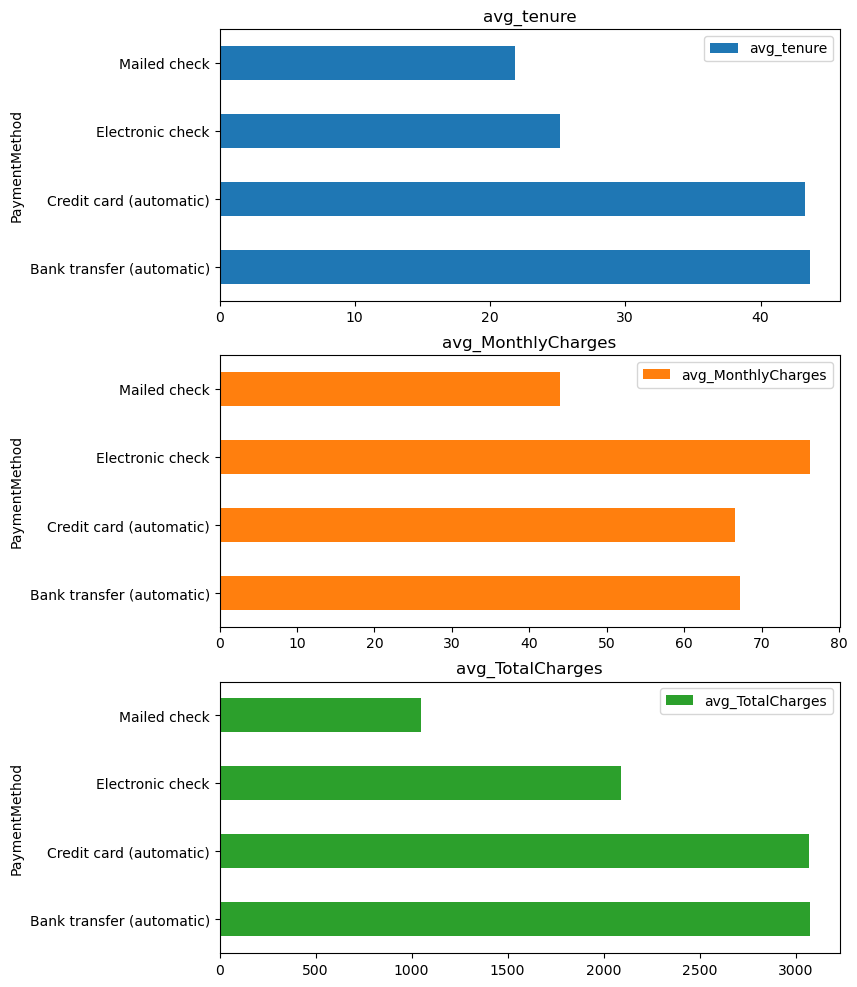

In [210]:
df.groupby('PaymentMethod').agg({'tenure':'mean',
                                'MonthlyCharges':'mean',
                                'TotalCharges':'mean'})\
                             .rename(columns ={
                                'tenure':'avg_tenure',
                                'MonthlyCharges':'avg_MonthlyCharges',
                                'TotalCharges':'avg_TotalCharges'})\
                            .plot(kind='barh', subplots=True, sharex=False,figsize=(8,12));

In [40]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [54]:
df['TotalCharges'].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1])

(0.25     398.550
 0.50    1394.550
 0.75    3786.600
 0.90    5973.690
 0.95    6921.025
 0.99    8039.256
 1.00    8684.800
 Name: TotalCharges, dtype: float64,
 2279.7343035638223)

### groupby

In [64]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2549.911442
Yes    1531.796094
Name: TotalCharges, dtype: float64

In [70]:
df.groupby(['Churn','MultipleLines'])['TotalCharges'].mean()

Churn  MultipleLines   
No     No                  1530.867749
       No phone service    1764.628906
       Yes                 3960.309689
Yes    No                   800.058834
       No phone service     687.087941
       Yes                 2431.614118
Name: TotalCharges, dtype: float64

In [82]:
df.groupby(['Churn','MultipleLines']).agg({'tenure':'mean',
                                'MonthlyCharges':'mean',
                                'TotalCharges':'mean'})

tenure  MonthlyCharges  TotalCharges
Churn MultipleLines                                            
No    No                28.660370       49.855037   1530.867749
      No phone service  37.017578       43.520996   1764.628906
      Yes               48.377181       79.217987   3960.309689
Yes   No                10.590106       67.184452    800.058834
      No phone service  15.835294       37.533824    687.087941
      Yes               25.788235       89.071176   2431.614118

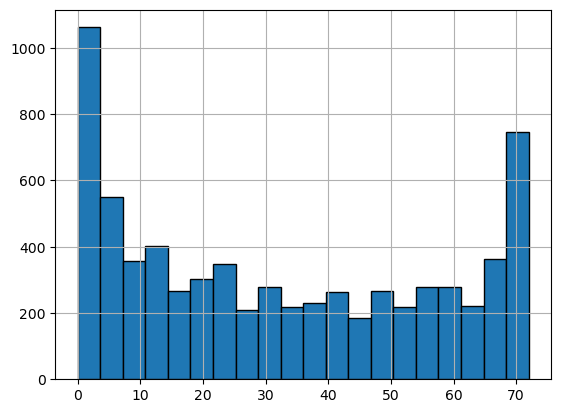

In [108]:
df['tenure'].hist(bins=20, edgecolor='k');

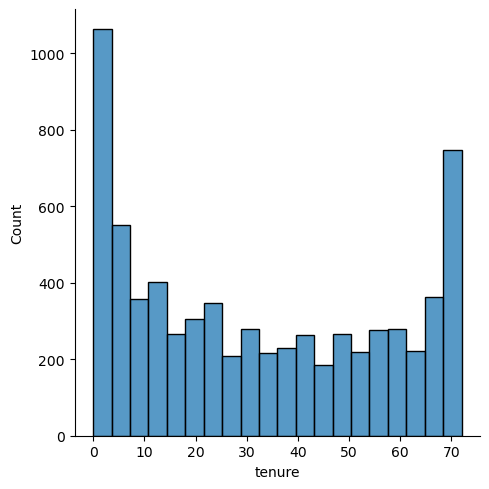

In [116]:
sns.displot(df['tenure'],bins=20);

## multivariate analysis
[back to top](#Lecture4:-Data-Exploration)
-  category vs category
-  category vs numeric
-  numeric vs numeric

### category vs category
- crosstab
- pivot table

In [140]:
pd.crosstab(index=df['Contract'],
            columns= df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [155]:
# joint distribution P(A,B)
pd.crosstab(index=df['Contract'],
            columns= df['Churn'],
           normalize='all')

Churn,No,Yes
Contract,,
Month-to-month,0.315207,0.234985
One year,0.185574,0.023570
Two year,0.233849,0.006815


In [153]:
# conditional prob P(A|B)
pd.crosstab(index=df['Contract'],
            columns= df['Churn'],
           normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [179]:
pd.pivot_table(df,
               index='Contract',
               columns='Churn',
               values = 'MonthlyCharges',
               aggfunc= 'mean')

Churn,No,Yes
Contract,,
Month-to-month,61.462635,73.019396
One year,62.508148,85.050904
Two year,60.012477,86.777083


In [171]:
df.pivot_table(index='Contract',
               columns='Churn',
               values = 'MonthlyCharges',
               aggfunc= 'mean')

Churn,No,Yes
Contract,,
Month-to-month,61.462635,73.019396
One year,62.508148,85.050904
Two year,60.012477,86.777083


In [181]:
df.pivot_table(index='Contract',
               columns='Churn',
               values = 'MonthlyCharges',
               aggfunc= ['mean','max','min'])

mean                max            min       
Churn                  No        Yes      No     Yes     No    Yes
Contract                                                          
Month-to-month  61.462635  73.019396  116.50  117.45  18.75  18.85
One year        62.508148  85.050904  118.60  118.35  18.25  19.30
Two year        60.012477  86.777083  118.75  116.20  18.40  19.35

In [205]:
df.pivot_table(index=['Contract','PaymentMethod'],
               columns='Churn',
               values = 'MonthlyCharges',   # any is acceptable
               aggfunc= np.size)\
    .apply(lambda x: x/sum(x), axis=1)

Churn                                           No       Yes
Contract       PaymentMethod                                
Month-to-month Bank transfer (automatic)  0.658744  0.341256
               Credit card (automatic)    0.672192  0.327808
               Electronic check           0.462703  0.537297
               Mailed check               0.684211  0.315789
One year       Bank transfer (automatic)  0.902813  0.097187
               Credit card (automatic)    0.896985  0.103015
               Electronic check           0.815562  0.184438
               Mailed check               0.931751  0.068249
Two year       Bank transfer (automatic)  0.966312  0.033688
               Credit card (automatic)    0.977625  0.022375
               Electronic check           0.922619  0.077381
               Mailed check               0.992147  0.007853

### category vs numeric
- Graphical
  - nominal vs numeric: bar chart
  - ordinal vs numeric: bar/line chart
  - category vs distribution: histogram, box plot
- non-graphical
  -  groupby + aggregate
  -  statistics: ANOVA, t-test, Spearman

#### objectives
- relationship to target variable
  - linear
  - proportion
  - specificity
- dependency
  - change in distribution when some variable change

#### convert numeric to category by qcut

In [216]:
df['tenure_bin'] = pd.qcut(df['tenure'],q=5)
df['tenure_bin']

customerID
7590-VHVEG    (-0.001, 6.0]
5575-GNVDE     (20.0, 40.0]
3668-QPYBK    (-0.001, 6.0]
7795-CFOCW     (40.0, 60.0]
9237-HQITU    (-0.001, 6.0]
                  ...      
6840-RESVB     (20.0, 40.0]
2234-XADUH     (60.0, 72.0]
4801-JZAZL      (6.0, 20.0]
8361-LTMKD    (-0.001, 6.0]
3186-AJIEK     (60.0, 72.0]
Name: tenure_bin, Length: 7043, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 6.0] < (6.0, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 72.0]]

In [279]:
ChurnByTenure = pd.crosstab(index = df['tenure_bin'],
                            columns= df['Churn'])\
                .apply(lambda x: x/sum(x), axis=1)
ChurnByTenure

Churn,No,Yes
tenure_bin,,
"(-0.001, 6.0]",0.470628,0.529372
"(6.0, 20.0]",0.665712,0.334288
"(20.0, 40.0]",0.776278,0.223722
"(40.0, 60.0]",0.844444,0.155556
"(60.0, 72.0]",0.933902,0.066098


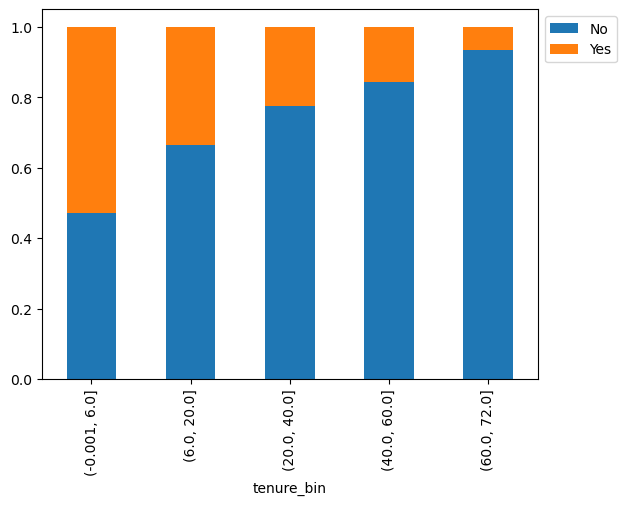

In [281]:
ChurnByTenure.plot(kind='bar',stacked= True)\
    .legend(bbox_to_anchor=(1,1));

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

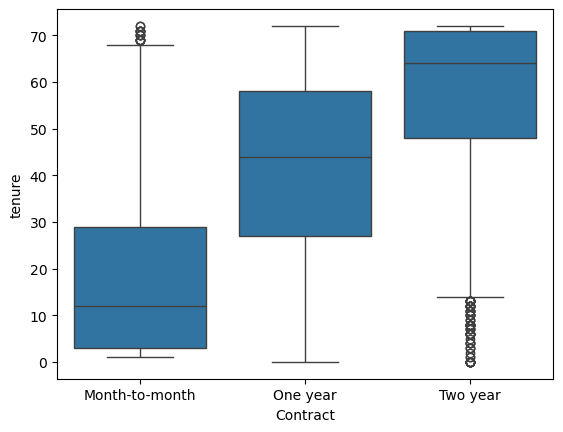

In [282]:
sns.boxplot(df,x='Contract',y='tenure');

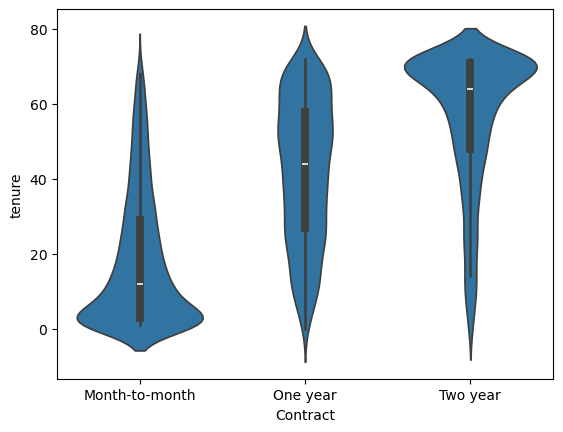

In [283]:
sns.violinplot(df,x='Contract',y='tenure');

### numeric vs numeric
- graphical
  - scatter plot
    - non-aggregate ** aware of unit eg.dataset-superstore **
    - aggregate
- non-graphical
  - correlation

#### graphical

<Axes: xlabel='tenure', ylabel='TotalCharges'>

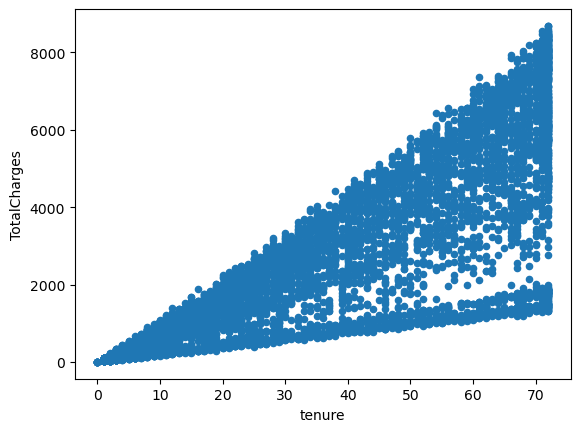

In [292]:
 df.plot.scatter(x='tenure',y='TotalCharges')

In [314]:
df_1 = df.groupby(['Contract', 'Churn'], as_index=False)\
        .agg({'tenure': 'mean', 'TotalCharges': 'mean'})
df_1

,Contract,Churn,tenure,TotalCharges
0,Month-to-month,No,21.033333,1521.927590
1,Month-to-month,Yes,14.016918,1164.460574
2,One year,No,41.674063,2901.348355
3,One year,Yes,44.963855,4066.212048
4,Two year,No,56.602914,3656.648604
5,Two year,Yes,61.270833,5432.363542


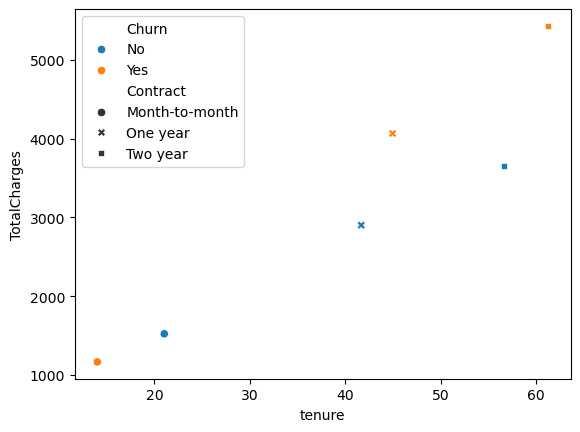

In [316]:
sns.scatterplot(df_1,
               x = 'tenure',
               y = 'TotalCharges',
               hue = 'Churn',
               style = 'Contract');

#### non-graphical

In [329]:
df_corr = df.select_dtypes(include='number').corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


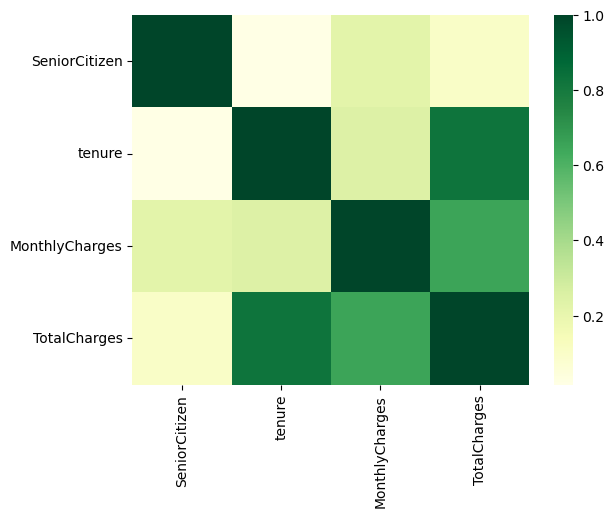

In [337]:
sns.heatmap(df_corr, cmap='YlGn');